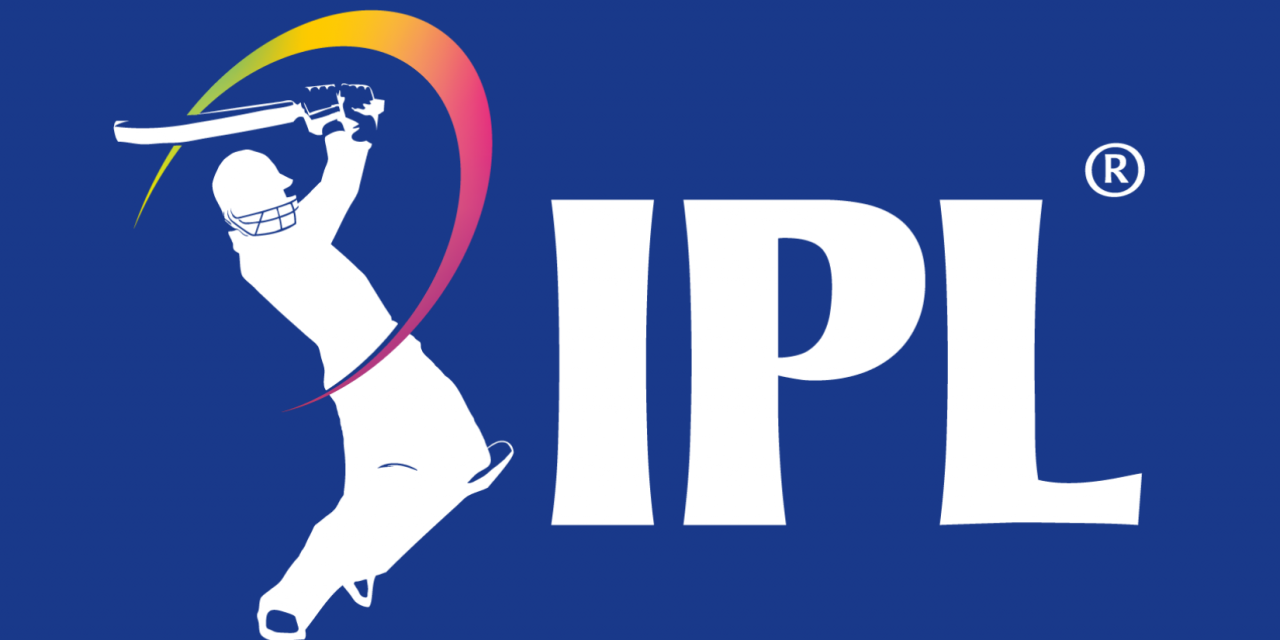

In [3]:
from IPython.display import Image
Image(filename='ipl.png') 


# IPL Data Analysis 2008-2019

The dataset I have used here is https://www.kaggle.com/nowke9/ipldata. It contains information about matches of IPL from season 2008 to 2019. 

I have explored the dataset and find out some interesting information from it, for example- Which team has performed best, which player has become Man-of-the-Match maximum times.
I have used python library pandas for exploring the dataset and matplotlib and seaborn for visualization.

I am doing this project as the final project assignment of [Data Analysis with Python: Zero to Pandas](zerotopandas.com), which is a very good beginner friendly course which covers:
1. Introduction to Programming with Python
2. Numerical Computing with Numpy.
3. Analyzing Tabular Data with Pandas
4. Visualization with Matplotlib and Seaborn.



## Downloading the Dataset for IPL

At first we will download the dataset from 'https://www.kaggle.com/nowke9/ipldata'.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/nowke9/ipldata' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanjanaghosh
Your Kaggle Key: ········


100%|██████████| 1.20M/1.20M [00:00<00:00, 89.3MB/s]

The dataset has been downloaded and extracted.

In [5]:
# Change this
#data_dir = './us-elections-dataset'
data_dir = './ipldata'

In [6]:
import os
os.listdir(data_dir)

['deliveries.csv', 'matches.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-course-project-ipldata-analysis" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanjana21ghosh/zerotopandas-course-project-ipldata-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis


'https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis'

## Data Preparation and Cleaning

We have downloaded the dataset. Now, we will start our data preparation and cleaning. 
First we will import the pandas library, and read our matches.csv dataset. Then will check the number of rows and columns in the dataset. After that we will check if there is any missing data in it and perform cleaning according to that.



In [101]:
import pandas as pd
df = pd.read_csv("./ipldata/matches.csv", index_col = 'id')
df.head(10)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN


In [102]:
print("The dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

The dataset has 756 rows and 17 columns.


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

We can see that most of the columns in umpire3 has null values, so we will remove this column from our dataset. 

In [104]:
df.drop(columns='umpire3',inplace=True)
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


Now after deleting umpire3 column we will fill the missing values of city, umpire1 and umpire2 with 'Unknown'.

In [105]:
matches_df = df.fillna({'city': 'Unknown','umpire1':'Unknown', 'umpire2':'Unknown'})
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             756 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          756 non-null    object
 15  umpire2          756 non-null    object
dtypes: int64(4), object(12)
memory usage: 100.4+ KB


We can see there are some missing value in the winner and player_of_match column, we will check what those columns indicate.

In [106]:
P = pd.isnull(matches_df['winner'])
P[P==True]

id
301      True
546      True
571      True
11340    True
Name: winner, dtype: bool

In [108]:
matches_df.loc[[301,546,571,11340]]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


We can see in the above 4 matches there was 'no result', that is why 'winner' and player_of_match' is NaN. The reason might be due to rain the match was stopped or similar kind of issues. So, we will discard these 4 rows from our analysis.

In [109]:
matches_df.drop([301,546,571,11340], inplace = True)


In [110]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 1 to 11415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           752 non-null    int64 
 1   city             752 non-null    object
 2   date             752 non-null    object
 3   team1            752 non-null    object
 4   team2            752 non-null    object
 5   toss_winner      752 non-null    object
 6   toss_decision    752 non-null    object
 7   result           752 non-null    object
 8   dl_applied       752 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      752 non-null    int64 
 11  win_by_wickets   752 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            752 non-null    object
 14  umpire1          752 non-null    object
 15  umpire2          752 non-null    object
dtypes: int64(4), object(12)
memory usage: 99.9+ KB


So, We have deleted the umpire3 column, changed all the missing values as 'Unknown' in the new dataframe and dropped the rows with no result. We can see all the columns now have 752 non-null values.

In [111]:
import jovian

In [112]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanjana21ghosh/zerotopandas-course-project-ipldata-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis


'https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis'

## Exploratory Analysis and Visualization

we have already done data preparation and cleaning, now we will analyse the datas and visualise them using matplotlib and seaborn. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [113]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [114]:
matches_df.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

We can see we have information of IPL from season 2008 to 2019.

Now we will check how many matches was played in each season.

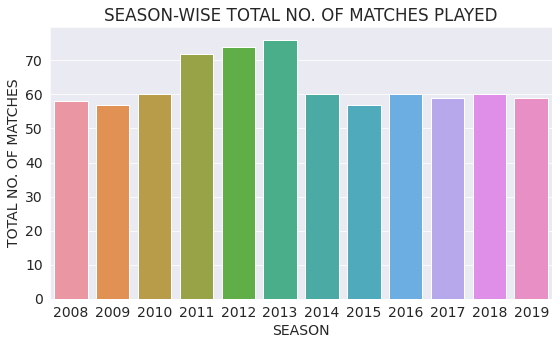

In [115]:
sns.countplot(x='season', data=matches_df)
plt.xlabel('SEASON')
plt.ylabel('TOTAL NO. OF MATCHES')
plt.title('SEASON-WISE TOTAL NO. OF MATCHES PLAYED')
plt.show()

We can see here the season-wise total no of matches played, in 2013 it was highest. Probable reason might be in 2013 more number of teams participated.

We will check the names of the teams.

In [116]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

We can see here the names of the teams. But some teams have changed their names with time, we will treat them as same team, so will rename them.

In [117]:
matches_df.replace({'Deccan Chargers':'Sunrisers Hyderabad',
                           'Delhi Daredevils':'Delhi Capitals',
                           'Pune Warriors':'Rising Pune Supergiant',
                           'Rising Pune Supergiants':'Rising Pune Supergiant'}, inplace=True)
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

We can see now we have updated the names of the same team to unique name, and we have total 11 teams.

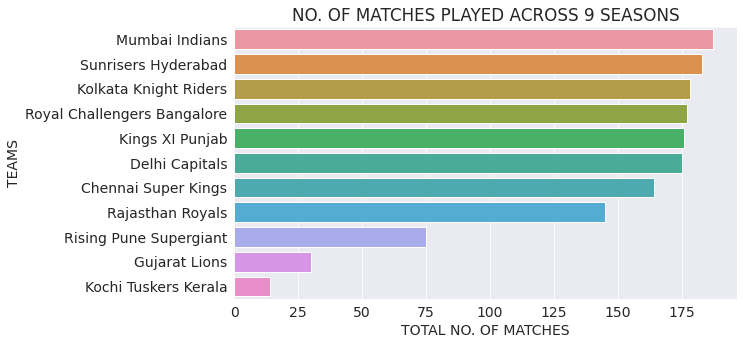

In [118]:
team1 = matches_df["team1"]
team2 = matches_df["team2"]
matches= pd.concat([team1,team2]).value_counts()
sns.barplot(x = matches, y= matches.index)
plt.title(str('No. of matches played across 9 seasons').upper())
plt.ylabel('TEAMS')
plt.xlabel('TOTAL NO. OF MATCHES')
plt.show()

We have plotted number of matches playes by each team across all the seasons. Mumbai Indians have played highest number of matches. The reason of such a low values of last three teams is that they only played in 1-2 seasons.

Text(0.5, 1.0, 'TEAM-WISE TOTAL NO. OF WIN')

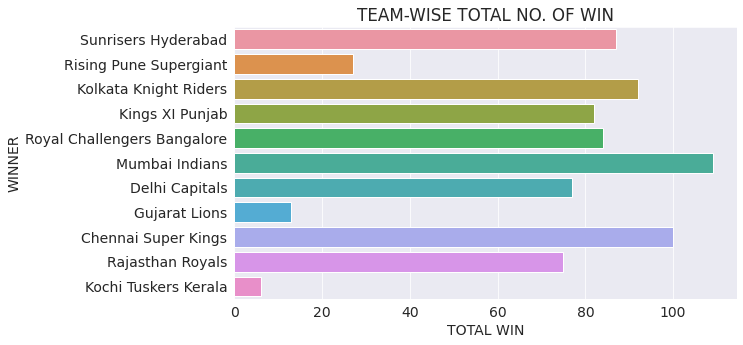

In [119]:
sns.countplot(y = 'winner', data=matches_df)
plt.xlabel('TOTAL WIN')
plt.ylabel('WINNER')
plt.title('TEAM-WISE TOTAL NO. OF WIN')

Here we have plotted total number of win for each team. We can see from the above plot Mumbai Indians has won highest no of matches, folowed by Chennai Super Kings.

In [120]:
winning_percentage = (matches_df['winner'].value_counts()/matches)*100
winning_percentage.sort_values(ascending=False)


Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Rajasthan Royals               51.724138
Kolkata Knight Riders          51.685393
Sunrisers Hyderabad            47.540984
Royal Challengers Bangalore    47.457627
Kings XI Punjab                46.590909
Delhi Capitals                 44.000000
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Rising Pune Supergiant         36.000000
dtype: float64

Text(0.5, 1.0, 'TEAM-WISE WINNING PERCENTAGE')

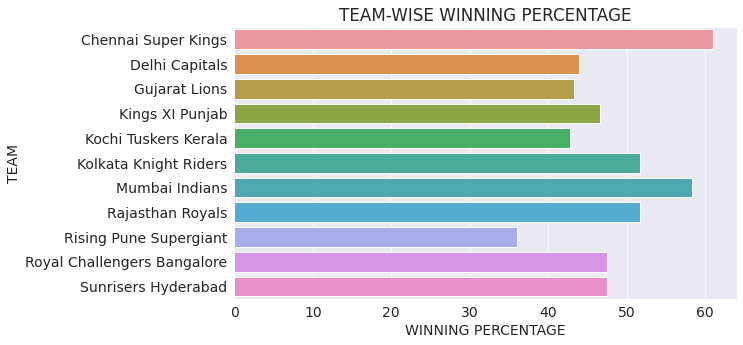

In [121]:
sns.barplot(x = winning_percentage, y = winning_percentage.index)
plt.xlabel('WINNING PERCENTAGE')
plt.ylabel('TEAM')
plt.title('TEAM-WISE WINNING PERCENTAGE')

We can interpret from the above graph that though Mumbai Indians have won maximum number of matches, winning percentage is highest for Chennai Super Kings, because the played less matches compared to Mumbai Indians.

In [122]:
top_venues = matches_df.venue.value_counts()[:20]
top_venues

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   71
Feroz Shah Kotla                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

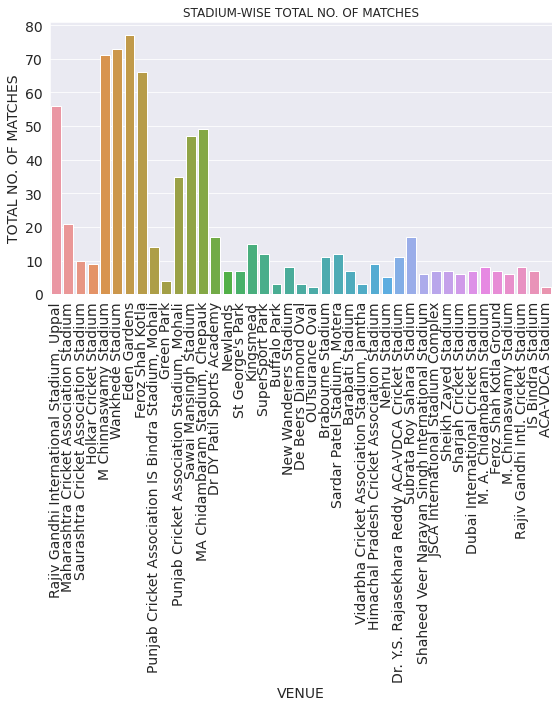

In [123]:
ax = sns.countplot(x='venue', data = matches_df)
matplotlib.rcParams['font.size'] = 10
plt.xticks(rotation='vertical')
ax.set(xlabel="VENUE", ylabel="TOTAL NO. OF MATCHES")
plt.title('STADIUM-WISE TOTAL NO. OF MATCHES')
plt.show(ax)


We have plotted stadium wise number of matches took place. We can see highest is Eden Gardens total 77 matches, followed by Wankhede Stadium with 73 matches and M Chinnaswamy Stadium with 71 matches.

We will now check whether winning chance incresase with winning the toss.

In [124]:
toss_winner_won = matches_df['toss_winner']==matches_df['winner']
#toss_winner_won.groupby(toss_winner_won).size()
tosswinner = toss_winner_won.value_counts()
tosswinner

True     393
False    359
dtype: int64

Text(0.5, 1.0, 'TOSS WINNER WINNING STATISTICS')

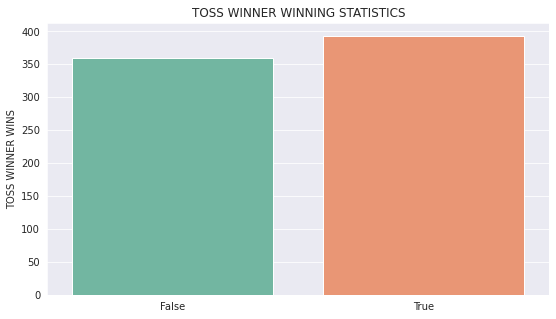

In [125]:
sns.countplot(x = toss_winner_won, palette = "Set2")
plt.ylabel('TOSS WINNER WINS')
plt.title('TOSS WINNER WINNING STATISTICS')

We can see the team which has won the toss has won the match more times than the other team.

Let us save and upload our work to Jovian before continuing

In [126]:
import jovian

In [127]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanjana21ghosh/zerotopandas-course-project-ipldata-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis


'https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis'

## Asking and Answering Questions

Now we will try to find out some interesting questions from the dataset and try to answer them.



#### Q1:  Which player has won Man of the Match highest times?

In [128]:
top_10_player = matches_df.player_of_match.value_counts()[:10]
top_10_player

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

We can see **CH Gayle** has become player of the match maximum times followed by AB de Villiers.

Text(0.5, 1.0, 'TOP 10 PLAYER WITH PLAYER_OF_MATCH')

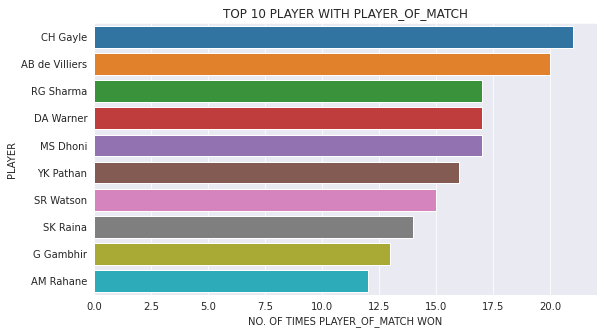

In [129]:
sns.barplot(top_10_player,top_10_player.index)
plt.xlabel('NO. OF TIMES PLAYER_OF_MATCH WON')
plt.ylabel('PLAYER')
plt.title('TOP 10 PLAYER WITH PLAYER_OF_MATCH')

#### Q2: In which city maximum no. of matches took place?

In [130]:
city = matches_df.groupby('city').size().sort_values(ascending=False)[:20]
city

city
Mumbai            101
Kolkata            77
Delhi              73
Bangalore          64
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
dtype: int64

Text(0.5, 1.0, 'CITY WISE TOTAL NO. OF MATCHES')

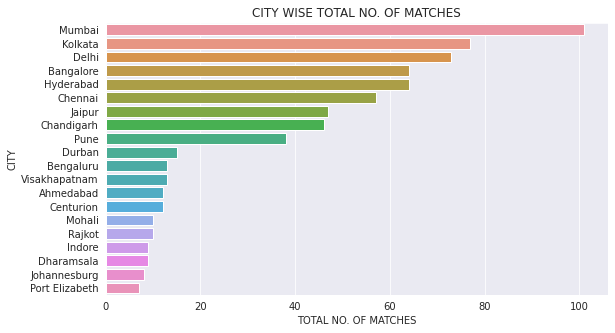

In [131]:
sns.barplot(x =city, y = city.index)
plt.xlabel('TOTAL NO. OF MATCHES')
plt.ylabel('CITY')
plt.title('CITY WISE TOTAL NO. OF MATCHES')

We have plotted top 20 citys with highest no. of matches took place. We can see **Mumbai** is the city where highest numbers of matches took place.

#### Q3: In how many matches win by 10 wicket happend?

In [132]:
win_by_10_wicket =matches_df['win_by_wickets']==10
win_by_10_wicket[win_by_10_wicket==True]
matches_df[win_by_10_wicket]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
35,2017,Chandigarh,2017-04-30,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
72,2008,Mumbai,2008-04-27,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
543,2015,Delhi,2015-04-26,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi


We can see only in the above 11 matches win by 10 wickets happend and the winner teams are shown below.

In [133]:
matches_df[win_by_10_wicket].winner

id
3             Kolkata Knight Riders
35                  Kings XI Punjab
72              Sunrisers Hyderabad
120                  Delhi Capitals
184     Royal Challengers Bangalore
299                Rajasthan Royals
377                  Mumbai Indians
391             Chennai Super Kings
543     Royal Challengers Bangalore
591             Sunrisers Hyderabad
7941    Royal Challengers Bangalore
Name: winner, dtype: object

#### Q4: In which macthes win with more than 100 runs happend?

In [134]:
win_by_morethan100_runs = matches_df['win_by_runs']>100
matches_df[win_by_morethan100_runs==True]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan


in the above matches more than 100 runs win took place and the winning teams are:

In [135]:
matches_df[win_by_morethan100_runs==True].winner

id
44                    Mumbai Indians
60             Kolkata Knight Riders
115                 Rajasthan Royals
296                  Kings XI Punjab
411      Royal Challengers Bangalore
557      Royal Challengers Bangalore
620      Royal Challengers Bangalore
7934                  Mumbai Indians
11147            Sunrisers Hyderabad
Name: winner, dtype: object

#### Q5: Which team won by highest run and who was Player of the Match in that match?

In [136]:
highest_run_win = matches_df['win_by_runs'].max()
matches_df[matches_df['win_by_runs']==highest_run_win]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


We can see **Mumbai Indians won by 146 runs against Delhi Capitals in Season 2017** which is the highest run win and
**LMP Simmons** was player of the match.

Let us save and upload our work to Jovian before continuing.

In [137]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanjana21ghosh/zerotopandas-course-project-ipldata-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis


'https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis'

## Inferences and Conclusion

We have completed our analysis with the IPL dataset and have find out some interesting insights from it as mentioned below:
1. We have seen this dataset contains information from IPL season 2008 to 2019.
2. While analysing total no of matches played by all the teams we have seen Mumbai Indians have played highest number of matches.
3. Total number of win is also highest for Mumbai Indians.
4. Though Mumbai Indians won maximum number of matches, winning rate (i.e total win by total matches played) is highest for Chennai Super kings.
5. When we checked toss winner winning statistics, we saw winning percentage is little higher for toss winner.
6. We also derived top 10 player list with maximum times Man of the Match winner and saw Chris Gayle tops the list.
7. Most number of matches took place in Mumbai.
8. Stadium-wise maximum matches took place in Eden Gardens.
9. We have find out the matches where winning team won by more than 100 runs, highest win was by Mumbai Indians 146 runs against Delhi Capitals in Season 2017.
10. We have also find out the matches where winning by 10 wickets took place.

In [139]:
import jovian

In [140]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanjana21ghosh/zerotopandas-course-project-ipldata-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis


'https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis'

## References and Future Work

I have done the basic data analysis and visualization using pandas and matplotlib with the matches.csv dataset.

We can also explore the deliveries.csv dataset and find the relationship and important statistics from that.


In [141]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sanjana21ghosh/zerotopandas-course-project-ipldata-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis


'https://jovian.ml/sanjana21ghosh/zerotopandas-course-project-ipldata-analysis'